In [1]:
import geopandas as gpd

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data= '../../../../Data/Map/S25/N03-501001_14-g_AdministrativeBoundary.shp'


Bad key "text.kerning_factor" on line 4 in
/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
gdf = gpd.read_file(data)

In [4]:
gdf

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_006,N03_007,geometry
0,神奈川県,None,津久井郡,佐野川村,None,None,14000,"POLYGON ((139.12394 35.63172, 139.12382 35.631..."
1,神奈川県,None,津久井郡,小原町,None,None,14000,"POLYGON ((139.19668 35.61760, 139.19647 35.617..."
2,神奈川県,None,津久井郡,沢井村,None,None,14000,"POLYGON ((139.16300 35.61783, 139.16286 35.617..."
3,神奈川県,None,津久井郡,吉野町,None,None,14000,"POLYGON ((139.18423 35.64507, 139.18429 35.644..."
4,神奈川県,None,津久井郡,千木良村,None,None,14000,"POLYGON ((139.20317 35.61969, 139.20319 35.619..."
...,...,...,...,...,...,...,...,...
193,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59706 35.22411, 139.59733 35.224..."
194,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59844 35.22356, 139.59817 35.224..."
195,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.60206 35.22106, 139.60178 35.221..."
196,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.61233 35.21994, 139.61261 35.221..."


In [5]:
gdf['N03_003_cp'] = gdf.N03_003.copy()

In [6]:
gdf['N03_004_cp'] = gdf.N03_004.copy()

In [7]:
gdf.N03_004_cp

0      佐野川村
1       小原町
2       沢井村
3       吉野町
4      千木良村
       ... 
193    横須賀市
194    横須賀市
195    横須賀市
196    横須賀市
197    横須賀市
Name: N03_004_cp, Length: 198, dtype: object

In [8]:
gdf.N03_003.unique()

array(['津久井郡', '愛甲郡', '高座郡', '横浜市', None, '足柄上郡', '中郡', '足柄下郡', '三浦郡'],
      dtype=object)

In [9]:
N03_003_list = {
    '三浦郡': '50',
    '高座郡': '90',
    '中郡': '102',
    '愛甲郡': '110',
    '津久井郡': '120',
    '足柄上郡': '130',
    '足柄下郡': '140',
}

In [10]:
gdf.N03_003_cp = gdf.N03_003_cp.map(N03_003_list)

In [11]:
gdf.N03_003_cp

0      120
1      120
2      120
3      120
4      120
      ... 
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
Name: N03_003_cp, Length: 198, dtype: object

In [12]:
N03_004_list = {
    '川崎市': '1',
    '鶴見区': '10',
    '港北区': '11',
    '保土ケ谷区': '12',
    '神奈川区':'13',
    '西区': '14',
    '中区': '15',
    '南区': '16',
    '磯子区': '17',
    '金沢区': '18',
    '戸塚区':'19',
    '鎌倉市': '20',
    '逗子町': '30',
    '葉山町': '30',
    '横須賀市': '40',
    '藤沢市': '60',
    '茅ヶ崎市': '70',
    '平塚市': '80',
    '相模原町' : '91',
    '座間町': '92',
    '大磯町': '101',
    '国府村': '101',
    '二宮町': '101',
    '大野町': '101',
    '旭村': '101',
    '土沢村': '101',
    '小田原市': '140',
}

In [13]:
gdf.N03_004_cp = gdf.N03_004_cp.map(N03_004_list)

In [14]:
gdf.N03_004_cp

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
193     40
194     40
195     40
196     40
197     40
Name: N03_004_cp, Length: 198, dtype: object

In [15]:
gdf['key'] = gdf.N03_003_cp.fillna(0).astype(int) + gdf.N03_004_cp.fillna(0).astype(int)

In [16]:
_df_data = '../Analysis/_df_grouped.csv'
_df = pd.read_csv(_df_data,index_col = 0)

In [17]:
_df

,lctn,gndr_F,gndr_M,ch_CONN,ch_DCT,ch_ORS,ch_SCH,ch_UNK,ind_AFF,ind_COM,...,ind_SRV,ind_UNK,gdn_occ_AFF,gdn_occ_MFG,gdn_occ_ORS,gdn_occ_SRV,gdn_occ_UE,gdn_occ_UK,gdn_occ_UNK,gdn_occ_WC
0,1,963.0,1108.0,357.0,6.0,1.0,1621.0,86.0,1.0,171.0,...,85.0,8.0,230.0,865.0,173.0,235.0,268.0,15.0,0.0,285.0
1,10,324.0,599.0,181.0,0.0,0.0,689.0,53.0,0.0,41.0,...,34.0,3.0,69.0,367.0,84.0,84.0,159.0,34.0,2.0,124.0
2,101,59.0,63.0,61.0,1.0,0.0,45.0,15.0,2.0,29.0,...,22.0,6.0,47.0,16.0,13.0,14.0,17.0,1.0,0.0,14.0
3,102,141.0,175.0,117.0,2.0,0.0,191.0,6.0,12.0,77.0,...,37.0,9.0,163.0,42.0,26.0,27.0,37.0,3.0,0.0,18.0
4,11,129.0,86.0,51.0,0.0,0.0,100.0,64.0,0.0,16.0,...,8.0,6.0,76.0,55.0,14.0,23.0,27.0,0.0,0.0,20.0
5,110,160.0,90.0,109.0,13.0,0.0,97.0,31.0,13.0,73.0,...,35.0,9.0,152.0,32.0,12.0,19.0,25.0,1.0,0.0,9.0
6,12,89.0,109.0,70.0,2.0,1.0,117.0,8.0,1.0,43.0,...,24.0,10.0,47.0,49.0,20.0,17.0,37.0,6.0,1.0,21.0
7,120,45.0,34.0,33.0,3.0,0.0,13.0,30.0,2.0,14.0,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
8,13,152.0,218.0,150.0,7.0,0.0,195.0,18.0,0.0,81.0,...,53.0,4.0,45.0,111.0,39.0,45.0,57.0,4.0,0.0,69.0
9,130,106.0,55.0,53.0,0.0,0.0,90.0,18.0,5.0,15.0,...,15.0,6.0,67.0,23.0,14.0,26.0,18.0,1.0,0.0,12.0


In [18]:
gdf_w_otsu = gdf.merge(_df, left_on = 'key', right_on = 'lctn' , how = 'left')

In [19]:
gdf_w_otsu

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_006,N03_007,geometry,N03_003_cp,N03_004_cp,...,ind_SRV,ind_UNK,gdn_occ_AFF,gdn_occ_MFG,gdn_occ_ORS,gdn_occ_SRV,gdn_occ_UE,gdn_occ_UK,gdn_occ_UNK,gdn_occ_WC
0,神奈川県,None,津久井郡,佐野川村,None,None,14000,"POLYGON ((139.12394 35.63172, 139.12382 35.631...",120,NaN,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
1,神奈川県,None,津久井郡,小原町,None,None,14000,"POLYGON ((139.19668 35.61760, 139.19647 35.617...",120,NaN,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
2,神奈川県,None,津久井郡,沢井村,None,None,14000,"POLYGON ((139.16300 35.61783, 139.16286 35.617...",120,NaN,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
3,神奈川県,None,津久井郡,吉野町,None,None,14000,"POLYGON ((139.18423 35.64507, 139.18429 35.644...",120,NaN,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
4,神奈川県,None,津久井郡,千木良村,None,None,14000,"POLYGON ((139.20317 35.61969, 139.20319 35.619...",120,NaN,...,12.0,2.0,58.0,7.0,7.0,3.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59706 35.22411, 139.59733 35.224...",NaN,40,...,187.0,31.0,108.0,359.0,260.0,110.0,262.0,31.0,0.0,123.0
194,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59844 35.22356, 139.59817 35.224...",NaN,40,...,187.0,31.0,108.0,359.0,260.0,110.0,262.0,31.0,0.0,123.0
195,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.60206 35.22106, 139.60178 35.221...",NaN,40,...,187.0,31.0,108.0,359.0,260.0,110.0,262.0,31.0,0.0,123.0
196,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.61233 35.21994, 139.61261 35.221...",NaN,40,...,187.0,31.0,108.0,359.0,260.0,110.0,262.0,31.0,0.0,123.0


/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


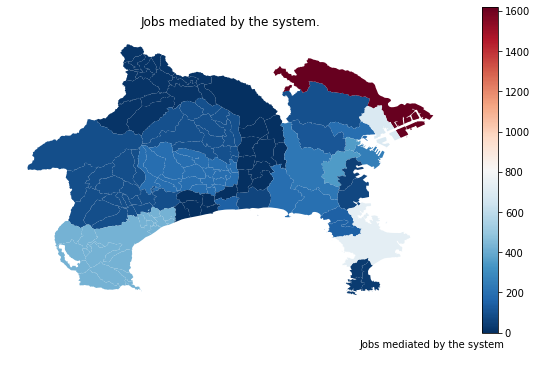

In [52]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ch_SCH', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Jobs mediated by the system',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Jobs mediated by the system.')
plt.savefig('../../../../Graphs/Employed/MapSCH.pdf')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


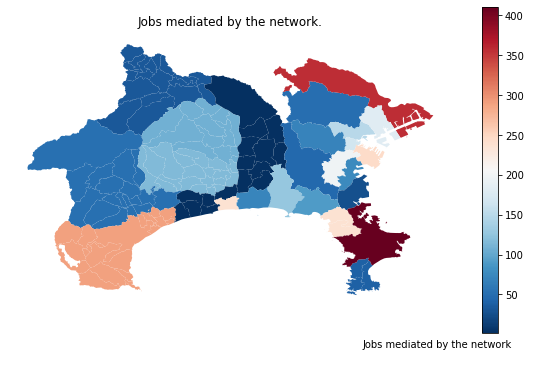

In [40]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ch_CONN', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Jobs mediated by the network',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Jobs mediated by the network.')
plt.savefig('../../../../Graphs/Employed/MapCONN.pdf')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


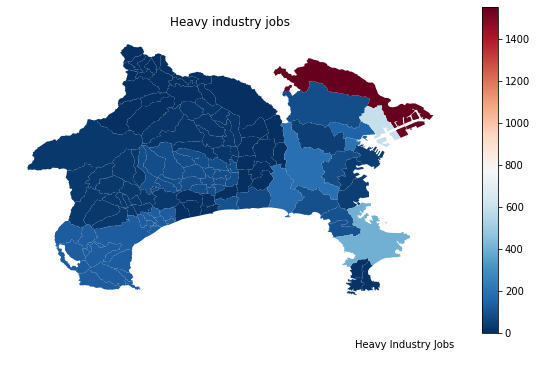

In [42]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ind_HI', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Heavy Industry Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Heavy industry jobs')
plt.savefig('../../../../Graphs/Employed/MapHI.pdf')

plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


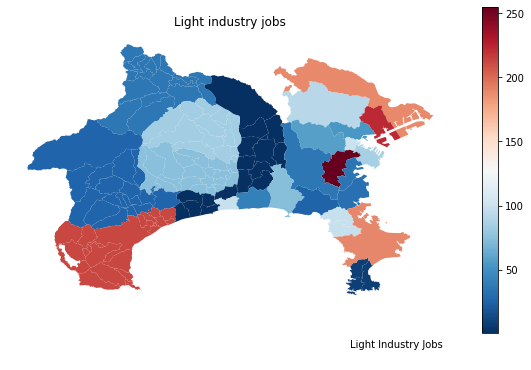

In [44]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ind_LI', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Light Industry Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Light industry jobs')
plt.savefig('../../../../Graphs/Employed/MapLI.pdf')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


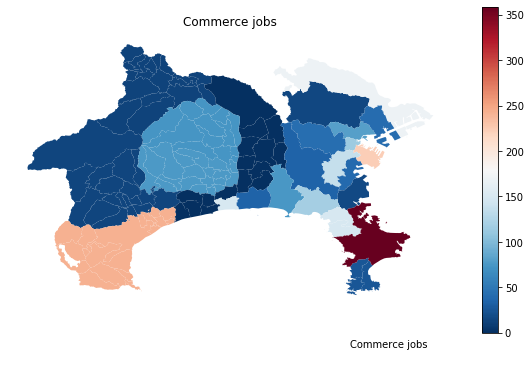

In [47]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ind_COM', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Commerce jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Commerce jobs')
plt.savefig('../../../../Graphs/Employed/MapCOM.pdf')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


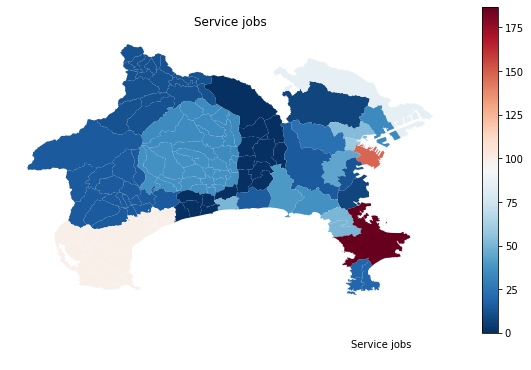

In [53]:
fig, gax = plt.subplots(figsize = (10,6))

#gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu.plot(ax = gax, edgecolor = 'None', column = 'ind_SRV', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Service jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.title('Service jobs')
plt.savefig('../../../../Graphs/Employed/MapSRV.pdf')
plt.show()

In [26]:
_df_gdn_AFF_data = '../Analysis/_df_gdn_AFF_grouped.csv'
_df_gdn_AFF = pd.read_csv(_df_gdn_AFF_data,index_col = 0)

In [27]:
gdf_w_otsu_AFF = gdf.merge(_df_gdn_AFF, left_on = 'key', right_on = 'lctn' , how = 'left')

In [28]:
gdf_w_otsu_AFF

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_006,N03_007,geometry,N03_003_cp,N03_004_cp,...,ind_SRV,ind_UNK,gdn_occ_AFF,gdn_occ_MFG,gdn_occ_ORS,gdn_occ_SRV,gdn_occ_UE,gdn_occ_UK,gdn_occ_UNK,gdn_occ_WC
0,神奈川県,None,津久井郡,佐野川村,None,None,14000,"POLYGON ((139.12394 35.63172, 139.12382 35.631...",120,NaN,...,9.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,神奈川県,None,津久井郡,小原町,None,None,14000,"POLYGON ((139.19668 35.61760, 139.19647 35.617...",120,NaN,...,9.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,神奈川県,None,津久井郡,沢井村,None,None,14000,"POLYGON ((139.16300 35.61783, 139.16286 35.617...",120,NaN,...,9.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,神奈川県,None,津久井郡,吉野町,None,None,14000,"POLYGON ((139.18423 35.64507, 139.18429 35.644...",120,NaN,...,9.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,神奈川県,None,津久井郡,千木良村,None,None,14000,"POLYGON ((139.20317 35.61969, 139.20319 35.619...",120,NaN,...,9.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59706 35.22411, 139.59733 35.224...",NaN,40,...,14.0,4.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.59844 35.22356, 139.59817 35.224...",NaN,40,...,14.0,4.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.60206 35.22106, 139.60178 35.221...",NaN,40,...,14.0,4.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,神奈川県,None,None,横須賀市,None,None,14201,"POLYGON ((139.61233 35.21994, 139.61261 35.221...",NaN,40,...,14.0,4.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


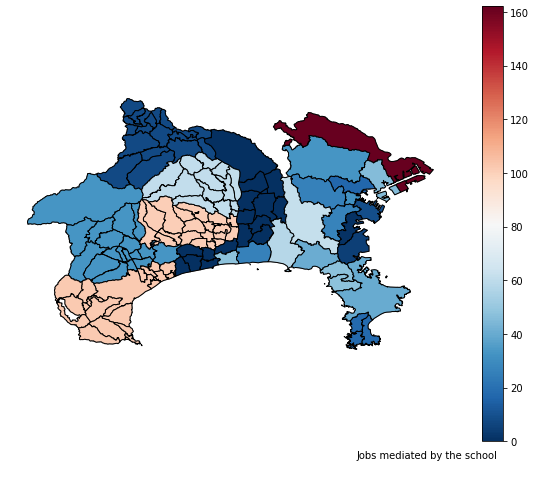

In [29]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ch_SCH', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Jobs mediated by the school',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


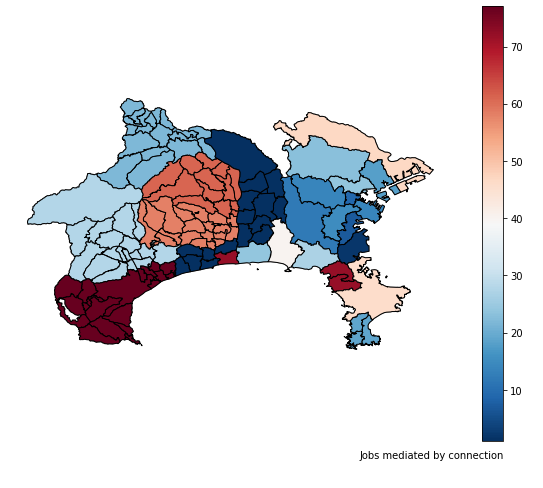

In [30]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ch_CONN', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Jobs mediated by connection',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


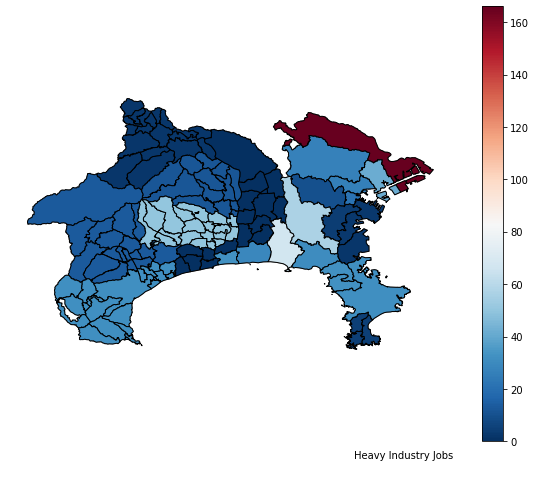

In [31]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ind_HI', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Heavy Industry Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


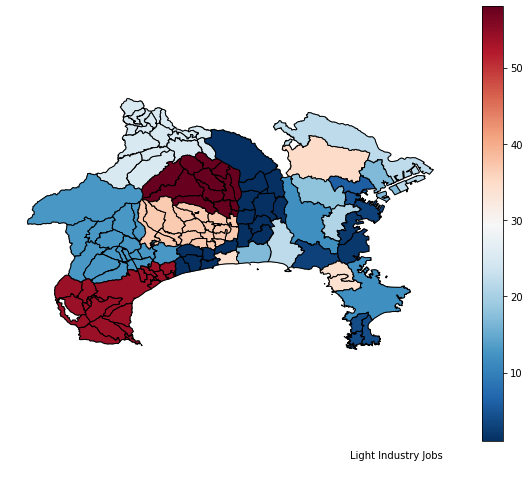

In [32]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ind_LI', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Light Industry Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


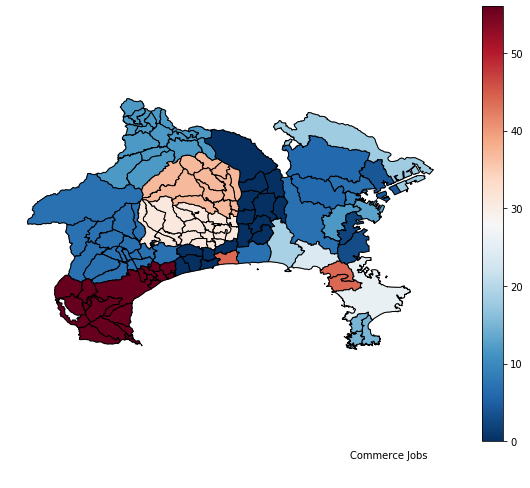

In [33]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ind_COM', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Commerce Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()

/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


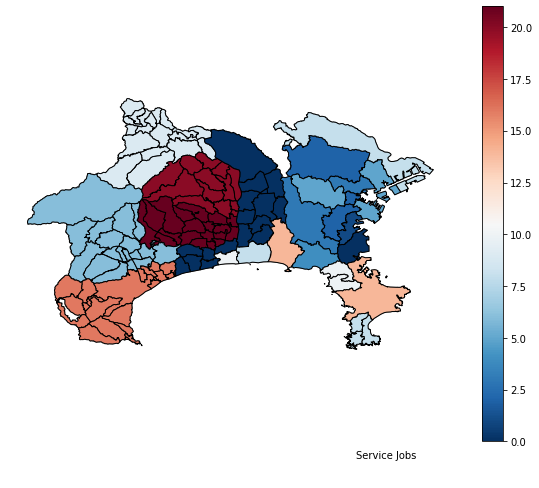

In [34]:
fig, gax = plt.subplots(figsize = (10,8))

gdf.plot(ax = gax, edgecolor='gray',color='white')
gdf_w_otsu_AFF.plot(ax = gax, edgecolor = 'black', column = 'ind_SRV', legend = True, 
               cmap = 'RdBu_r')
gax.annotate('Service Jobs',xy=(0.66, 0.06),  xycoords='figure fraction')
plt.axis('off')
plt.show()